In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [115]:
df_tourism2=pd.read_csv("df_tourism2.csv")
df_tourism2.head()
                       

,Unnamed: 0,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.000000,6.0,3.0,3.0,1.0,2.0,0.0,20993.0
1,1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.000000,14.0,3.0,4.0,2.0,3.0,2.0,20130.0
2,2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.000000,8.0,3.0,4.0,7.0,3.0,0.0,17090.0
3,3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.000000,9.0,2.0,3.0,2.0,5.0,1.0,17909.0
4,4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,33.908223,8.0,2.0,3.0,1.0,5.0,0.0,18468.0


In [116]:
df_tourism2.shape

(4888, 20)

In [117]:
df_tourism2=df_tourism2.drop("Unnamed: 0",axis=1)


In [118]:
df_tourism2.head()

,ProdTaken,PreferredLoginDevice,CityTier,Occupation,Gender,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,OwnCar,Designation,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome
0,Yes,Self Enquiry,Tier-3,Salaried,Female,Super Deluxe,3 Star,Single,Yes,Yes,Manager,41.000000,6.0,3.0,3.0,1.0,2.0,0.0,20993.0
1,No,Company Invited,Tier-1,Salaried,Male,Super Deluxe,4 Star,Divorced,No,Yes,Manager,49.000000,14.0,3.0,4.0,2.0,3.0,2.0,20130.0
2,Yes,Self Enquiry,Tier-1,Free Lancer,Male,Multi,3 Star,Single,Yes,No,Executive,37.000000,8.0,3.0,4.0,7.0,3.0,0.0,17090.0
3,No,Company Invited,Tier-1,Salaried,Female,Multi,3 Star,Divorced,Yes,Yes,Executive,33.000000,9.0,2.0,3.0,2.0,5.0,1.0,17909.0
4,No,Self Enquiry,Tier-1,Small Business,Male,Multi,4 Star,Divorced,No,Yes,Executive,33.908223,8.0,2.0,3.0,1.0,5.0,0.0,18468.0


In [119]:
### ordinal type categorical variable.Let's convert into numeric.

In [120]:
df_tourism2['ProductPitched_codes'] = df_tourism2['ProductPitched'].map({'Multi':1,'Standard':2,'Deluxe':3,'Super Deluxe':4,'King':5})
df_tourism2.drop('ProductPitched',inplace=True,axis=1)
df_tourism2['PreferredPropertyStar_codes'] = df_tourism2['PreferredPropertyStar'].map({'3 Star':1,'4 Star':2,'5 Star':3})
df_tourism2.drop('PreferredPropertyStar',inplace=True,axis=1)
df_tourism2['Designation_codes'] = df_tourism2['Designation'].map({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5})
df_tourism2.drop('Designation',inplace=True,axis=1)

In [121]:
categorical2=list(df_tourism2.dtypes[df_tourism2.dtypes == object].index)
numerical2 = list(df_tourism2.dtypes[df_tourism2.dtypes != object].index)
df_tourism2_cat = df_tourism2[categorical2]
df_tourism2_dummies = pd.get_dummies(df_tourism2_cat)
df_tourism2_dummified = pd.concat([df_tourism2[numerical2],df_tourism2_dummies],axis=1)
df_tourism2_dummified.head()

,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisited,MonthlyIncome,ProductPitched_codes,PreferredPropertyStar_codes,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_No,Passport_Yes,OwnCar_No,OwnCar_Yes
0,41.000000,6.0,3.0,3.0,1.0,2.0,0.0,20993.0,4,1,...,1,0,0,0,1,0,0,1,0,1
1,49.000000,14.0,3.0,4.0,2.0,3.0,2.0,20130.0,4,2,...,0,1,1,0,0,0,1,0,0,1
2,37.000000,8.0,3.0,4.0,7.0,3.0,0.0,17090.0,1,1,...,0,1,0,0,1,0,0,1,1,0
3,33.000000,9.0,2.0,3.0,2.0,5.0,1.0,17909.0,1,1,...,1,0,1,0,0,0,0,1,0,1
4,33.908223,8.0,2.0,3.0,1.0,5.0,0.0,18468.0,1,2,...,0,1,1,0,0,0,1,0,0,1


In [122]:
df_tourism2_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   4888 non-null   float64
 1   DurationOfPitch                       4888 non-null   float64
 2   NumberOfPersonVisited                 4888 non-null   float64
 3   NumberOfFollowups                     4888 non-null   float64
 4   NumberOfTrips                         4888 non-null   float64
 5   PitchSatisfactionScore                4888 non-null   float64
 6   NumberOfChildrenVisited               4888 non-null   float64
 7   MonthlyIncome                         4888 non-null   float64
 8   ProductPitched_codes                  4888 non-null   int64  
 9   PreferredPropertyStar_codes           4888 non-null   int64  
 10  Designation_codes                     4888 non-null   int64  
 11  ProdTaken_No     

#### ckeck the propensity of target class 

In [123]:
df_tourism2["ProdTaken"].value_counts("normalize=True")

No     0.811784
Yes    0.188216
Name: ProdTaken, dtype: float64

#### train test split 

In [124]:
### create an independent anddependent set
X=df_tourism2_dummified.drop("ProdTaken_Yes",axis=1)
y=df_tourism2_dummified.pop("ProdTaken_Yes")

In [125]:
### split the data into 70-30 train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [126]:
# Applying SMOTE to the training data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=1234)
os_data_X,os_data_Y = os.fit_sample(X_train,y_train.ravel())


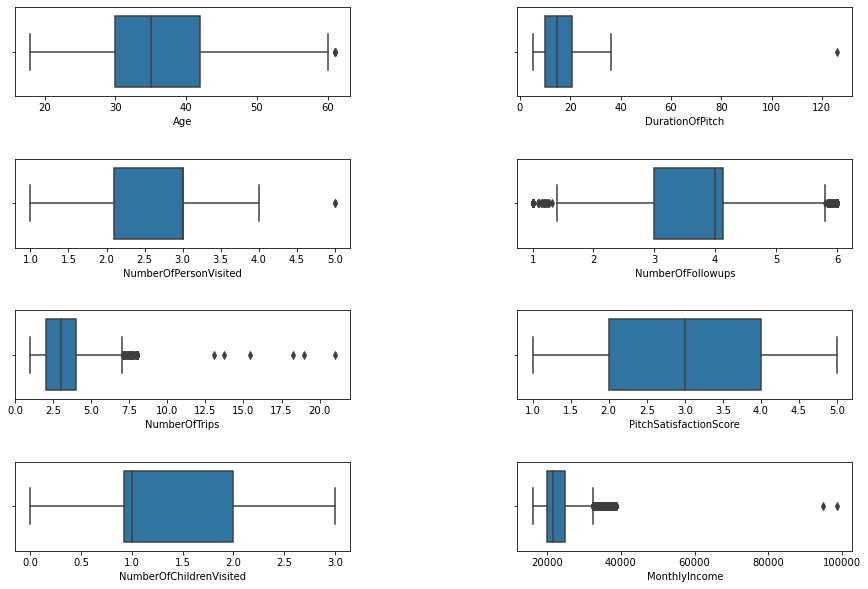

In [127]:
# Checking for outliers
num = list(os_data_X.dtypes[os_data_X.dtypes == 'float64'].index)
fig,axes = plt.subplots(4,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=os_data_X,ax=j)

In [128]:
# Treating the Outliers - Winsorization
def remove_outlier(col):
    sorted(col) # Sorting the column
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for i in num:
    ll,ul = remove_outlier(os_data_X[i])
    os_data_X[i] = np.where(os_data_X[i]>ul,os_data_X[i].quantile(0.95),os_data_X[i])
    os_data_X[i] = np.where(os_data_X[i]<ll,os_data_X[i].quantile(0.05),os_data_X[i])    

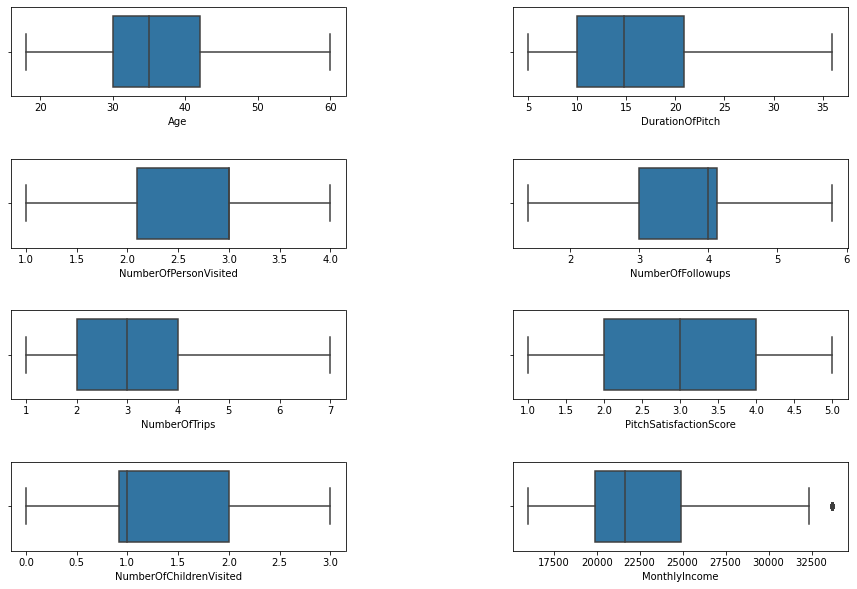

In [129]:
fig,axes = plt.subplots(4,2,figsize=(15,10))
plt.subplots_adjust(hspace=0.7,wspace=0.5)
for i,j in zip(num,axes.flatten()):
    sns.boxplot(x=i,data=os_data_X,ax=j)

In [130]:
import statsmodels.api as sm
logit_mod = sm.Logit(os_data_Y,os_data_X)
result = logit_mod.fit()
coef_summary = pd.DataFrame(result.params,columns=['Coef'])
coef_summary['Pvalue'] = result.pvalues
coef_summary

         Current function value: inf
         Iterations: 35


,Coef,Pvalue
Age,0.068090,0.970408
DurationOfPitch,0.062458,0.968391
NumberOfPersonVisited,0.163108,0.995634
NumberOfFollowups,0.698068,0.957425
NumberOfTrips,0.153350,0.983619
PitchSatisfactionScore,0.244258,0.980462
NumberOfChildrenVisited,-0.901524,0.952498
MonthlyIncome,0.000445,0.927605
ProductPitched_codes,0.368245,0.983420
PreferredPropertyStar_codes,0.129040,0.992416


In [132]:
# Identifying the non significant variables
coef_summary[coef_summary['Pvalue']>0.05]

,Coef,Pvalue
Age,0.068090,0.970408
DurationOfPitch,0.062458,0.968391
NumberOfPersonVisited,0.163108,0.995634
NumberOfFollowups,0.698068,0.957425
NumberOfTrips,0.153350,0.983619
PitchSatisfactionScore,0.244258,0.980462
NumberOfChildrenVisited,-0.901524,0.952498
MonthlyIncome,0.000445,0.927605
ProductPitched_codes,0.368245,0.983420
PreferredPropertyStar_codes,0.129040,0.992416
